<a href="https://colab.research.google.com/github/akarshn95/Handwritten_Digit_Recognizer/blob/master/Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training Data size:", len(X_train))
print("Test Data Size:", len(X_test))

11493376/11490434 [==============================] - 0s 0us/step
Training Data size: 60000
Test Data Size: 10000


9


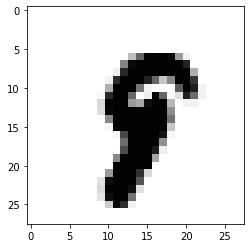

In [4]:
image_index = 1235
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')

In [5]:
X_train.shape

(60000, 28, 28)

## Reshaping and Normalizing Data

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Building and Compiling Layers

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2100 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0872 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0593 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0455 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0363 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0215 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0179 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 37s 20m

## Evaluating the model

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0648 - accuracy: 0.9853


[0.06480200588703156, 0.9853000044822693]

Predicted Digit is:  3


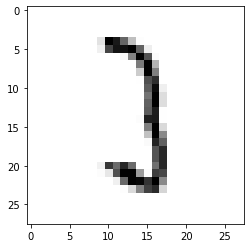

In [14]:
image_index = 4443
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Digit is: ",pred.argmax())

Predicted Digit is:  8


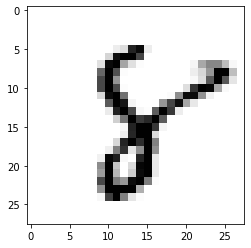

In [28]:
image_index = 5231
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Digit is: ",pred.argmax())

Predicted Digit is:  7


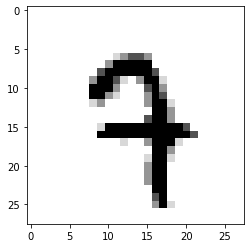

In [32]:
image_index = 3333
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Digit is: ",pred.argmax())